**Importing the libaries I will use**

**Preface**
I want to start by thanking Andra and the Veridion team for giving me this opportunity to display my skills.
Further down you can see my analysis alongside some markups that I wrote in order to document and display my ideas and process of thought. I have to say it was an interesting task, being the first time I encountered such a task.
Thank you again!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the data**
When I first tried to read the data I was getting the "error tokenizing data" for the facebook and google datasets, I decided to skip reading the bad lines. I decided to count how many lines I was skipping for each dataset since I think it will be an important factor when deciding which dataset to believe when joining the data.
Also the website dataset was weirdly formed, didn't look like a CSV file at all when opened, but then I managed to make it read using the ; separator.

In [2]:
def read_csv_with_skipped_lines(path):
    with open(path) as i:
        total_lines = sum(1 for line in i)
    df = pd.read_csv(path, low_memory=False, on_bad_lines='skip')
    lines_skipped = total_lines - len(df) - 1
    print(f"Total lines in {path}: {total_lines}")
    print(f"Number of lines skipped in {path}: {lines_skipped}")
    return df

In [3]:
facebook_df = read_csv_with_skipped_lines('/kaggle/input/veridion-datasets/facebook_dataset.csv')
facebook_df.head()

Total lines in /kaggle/input/veridion-datasets/facebook_dataset.csv: 72081
Number of lines skipped in /kaggle/input/veridion-datasets/facebook_dataset.csv: 913


,domain,address,categories,city,country_code,country_name,description,email,link,name,page_type,phone,phone_country_code,region_code,region_name,zip_code
0,euro-hygiene-34.fr,"134 rue entrepreneurs, za du vigné, 30420, cal...",NaN,calvisson,fr,france,NaN,NaN,https://euro-hygiene-34.fr,Euro Hygiène,LocalBusiness,NaN,NaN,occ,occitanie,30420
1,lakesidehomeservices.ca,NaN,Appliance Repair & Maintenance|Home Builders &...,NaN,ca,NaN,NaN,NaN,https://lakesidehomeservices.ca,Lakeside Home Services,LocalBusiness,1.613832e+10,ca,NaN,NaN,NaN
2,rossiterboats.com,NaN,Boats & Yachts Dealers|Boat Tours & Cruises,NaN,NaN,NaN,At Rossiter Boats we build semi-custom power b...,info@rossiterboats.com,http://rossiterboats.com,Rossiter Boats,LocalBusiness,NaN,NaN,NaN,NaN,NaN
3,caa-architecture.com,"601 cordova st w # 270, v6b 1g1, vancouver, bc...",Architects & Architectural Services|Other Engi...,vancouver,ca,canada,NaN,office@caa-arcitecture.com,http://caa-architecture.com,Chandler Associates Architecture Inc.,LocalBusiness,1.604687e+10,ca,bc,british columbia,v6b 1g1
4,apexsurety.ca,"unit 3 - 4 donald street, r3l 2t7, winnipeg, m...",NaN,winnipeg,ca,canada,NaN,NaN,https://apexsurety.ca,Apex Surety & Insurance Ltd.,LocalBusiness,1.204560e+10,ca,mb,manitoba,r3l 2t7


In [4]:
google_df = read_csv_with_skipped_lines('/kaggle/input/veridion-datasets/google_dataset.csv')
google_df.head()

Total lines in /kaggle/input/veridion-datasets/google_dataset.csv: 356521
Number of lines skipped in /kaggle/input/veridion-datasets/google_dataset.csv: 9595


,address,category,city,country_code,country_name,name,phone,phone_country_code,raw_address,raw_phone,region_code,region_name,text,zip_code,domain
0,"28 Central Coast Hwy, West Gosford NSW 2250, A...",Fabric-Based Home Goods,gosford,au,australia,Spotlight West Gosford,+61243355946,au,"West Gosford NSW, Australia",+61 2 4335 5946,nsw,new south wales,"4.1 (766) · Craft store West Gosford NSW, Aust...",2250,spotlightstores.com
1,"400 Scott St, St. Catharines, ON L2M 3W2, Canada",Book Stores,st. catharines,ca,canada,Heritage Christian Book Store,+19059374553,ca,400 Scott St · In Grantham Plaza,+1 905-937-4553,on,ontario,4.7 (100) · Book store 400 Scott St · In Grant...,l2m 3w2,bookmanager.com
2,"191 Pleasant St, Yarmouth, NS B5A 2J9, Canada",Other Building Material Retailers,yarmouth,ca,canada,Pleasant Timber Mart,+19027429181,ca,"7+ years in business · Yarmouth, NS, Canada",+1 902-742-9181,ns,nova scotia,4.7 (40) · Building materials store 7+ years i...,b5a 2j9,timbermart.ca
3,"11040 Santa Monica Blvd Suite 370, Los Angeles...",Plastic Surgery Clinics,los angeles,us,united states,Skin Specifics Medical Spa West LA,+18184268353,us,7+ years in business · 11040 Santa Monica Blvd...,+1 818-426-8353,ca,california,4.3 (15) · Medical spa 7+ years in business · ...,90025,linktr.ee
4,NaN,Catering & Delivery,NaN,NaN,NaN,Lakay express,NaN,NaN,NaN,NaN,NaN,NaN,5.0 (1) · Mobile caterer Open ⋅ Closes 9PM,NaN,linktr.ee


In [5]:
website_df = pd.read_csv('/kaggle/input/veridion-datasets/website_dataset.csv', sep=';', low_memory=False)
website_df.head()

,root_domain,domain_suffix,language,legal_name,main_city,main_country,main_region,phone,site_name,tld,s_category
0,converterman.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clothesencounter.ca,ca,en,NaN,cardigan,canada,prince edward island,13066937766,Clothes Encounter,ca,Shoes & Other Footwear Stores
2,investa.com.au,com.au,en,Investa Wholesale Funds Management Limited,brisbane,australia,queensland,61282269300,Investa Property Group,au,Real Estate Developers
3,timminsgarage.com,com,en,Timmins Garage Inc.,timmins,canada,ontario,18775896640,Timmins Garage,com,Automobile Dealers & Manufacturers
4,destinate.ca,ca,en,Destinate Group Ltd.,NaN,Canada,NaN,NaN,Destinate Group,ca,Business Consulting


**I will now take a look at the columns for each dataset, I want to see their names and their data type. I will also take a look at nulls and unique values.**

In [6]:
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71167 entries, 0 to 71166
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   domain              71167 non-null  object 
 1   address             56690 non-null  object 
 2   categories          54593 non-null  object 
 3   city                44567 non-null  object 
 4   country_code        57191 non-null  object 
 5   country_name        44865 non-null  object 
 6   description         27189 non-null  object 
 7   email               19753 non-null  object 
 8   link                71167 non-null  object 
 9   name                71167 non-null  object 
 10  page_type           71163 non-null  object 
 11  phone               44349 non-null  float64
 12  phone_country_code  37551 non-null  object 
 13  region_code         44562 non-null  object 
 14  region_name         44562 non-null  object 
 15  zip_code            35623 non-null  object 
dtypes: f

In [7]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346925 entries, 0 to 346924
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   address             321315 non-null  object
 1   category            295862 non-null  object
 2   city                302199 non-null  object
 3   country_code        295361 non-null  object
 4   country_name        302235 non-null  object
 5   name                346893 non-null  object
 6   phone               314789 non-null  object
 7   phone_country_code  234104 non-null  object
 8   raw_address         302909 non-null  object
 9   raw_phone           318977 non-null  object
 10  region_code         302049 non-null  object
 11  region_name         302054 non-null  object
 12  text                343411 non-null  object
 13  zip_code            265646 non-null  object
 14  domain              346923 non-null  object
dtypes: object(15)
memory usage: 39.7+ MB


In [8]:
website_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72018 entries, 0 to 72017
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   root_domain    72017 non-null  object
 1   domain_suffix  71900 non-null  object
 2   language       66826 non-null  object
 3   legal_name     31989 non-null  object
 4   main_city      60966 non-null  object
 5   main_country   64869 non-null  object
 6   main_region    60933 non-null  object
 7   phone          65640 non-null  object
 8   site_name      68714 non-null  object
 9   tld            71757 non-null  object
 10  s_category     70634 non-null  object
dtypes: object(11)
memory usage: 6.0+ MB


**Google has the most lines, followed by website and facebook which have similar number of lines.
Almost all columns are dtype object and I see that there are common columns in all the datasets, like domain, phone, region.**

In [9]:
facebook_df.isnull().sum()

domain                    0
address               14477
categories            16574
city                  26600
country_code          13976
country_name          26302
description           43978
email                 51414
link                      0
name                      0
page_type                 4
phone                 26818
phone_country_code    33616
region_code           26605
region_name           26605
zip_code              35544
dtype: int64

In [10]:
google_df.isnull().sum()

address                25610
category               51063
city                   44726
country_code           51564
country_name           44690
name                      32
phone                  32136
phone_country_code    112821
raw_address            44016
raw_phone              27948
region_code            44876
region_name            44871
text                    3514
zip_code               81279
domain                     2
dtype: int64

In [11]:
website_df.isnull().sum()

root_domain          1
domain_suffix      118
language          5192
legal_name       40029
main_city        11052
main_country      7149
main_region      11085
phone             6378
site_name         3304
tld                261
s_category        1384
dtype: int64

**What I see is that the domain column has the least amount of nulls in each dataset. This makes it a good fit for joining the datasets.**

In [12]:
facebook_df.nunique()

domain                71167
address               56437
categories            10073
city                   6326
country_code            130
country_name            116
description           26811
email                 19745
link                  71167
name                  70999
page_type                 4
phone                 44272
phone_country_code      100
region_code             434
region_name             681
zip_code              25958
dtype: int64

In [13]:
google_df.nunique()

address               274698
category                 469
city                   22066
country_code             213
country_name             187
name                  344398
phone                 277563
phone_country_code       212
raw_address           137701
raw_phone             284780
region_code              678
region_name             1502
text                  339460
zip_code              100697
domain                 70109
dtype: int64

In [14]:
website_df.nunique()

root_domain      72017
domain_suffix      667
language            71
legal_name       30619
main_city         9598
main_country       294
main_region       1114
phone            60053
site_name        67541
tld                293
s_category         562
dtype: int64

**I see that the domain column has almost the same number of unique values across all three datasets. Again this makes it a good candidate for performing the join operation.
I will also drop duplicates now.**

In [15]:
google_df = google_df.drop_duplicates()
facebook_df = facebook_df.drop_duplicates()
website_df = website_df.drop_duplicates()

In [16]:
google_df[google_df['domain'] == 'spotlightstores.com']

,address,category,city,country_code,country_name,name,phone,phone_country_code,raw_address,raw_phone,region_code,region_name,text,zip_code,domain
0,"28 Central Coast Hwy, West Gosford NSW 2250, A...",Fabric-Based Home Goods,gosford,au,australia,Spotlight West Gosford,+61243355946,au,"West Gosford NSW, Australia",+61 2 4335 5946,nsw,new south wales,"4.1 (766) · Craft store West Gosford NSW, Aust...",2250,spotlightstores.com
5187,"Harvey Norman Centre, 26 Boeing Ave, Ballina N...",Bathroom Furniture & Equipment,ballina,au,australia,Spotlight Ballina,+61266183600,au,"Ballina NSW, Australia · In Harvey Norman Ballina",+61 2 6618 3600,nsw,new south wales,"4.1 (223) · Bathroom supply store Ballina NSW,...",2478,spotlightstores.com
18923,"19 Howard Ave, Dee Why NSW 2099, Australia",NaN,liverpool,au,australia,Spotlight Stores,+61299722599,au,"Liverpool NSW, Australia · +61 2 9601 4000",+61 2 9972 2599,nsw,new south wales,"Party store Liverpool NSW, Australia · +61 2 9...",2170,spotlightstores.com
41385,"37 Dixon Rd, Rockingham WA 6168, Australia",Fabric-Based Home Goods,rockingham,au,australia,Spotlight Rockingham,+61895572300,au,"Rockingham WA, Australia",+61 8 9557 2300,wa,western australia,"4.1 (963) · Craft store Rockingham WA, Austral...",6168,spotlightstores.com
43176,"Level 2, No, 2, Jalan PJU 7/2, Mutiara Damansa...",Fabric-Based Home Goods,petaling jaya,my,malaysia,Spotlight IPC,+60377270088,NaN,"Petaling Jaya, Selangor · In IPC Shopping Cent...",03-7727 0088,10,selangor,"4.3 (891) · Craft store Petaling Jaya, Selango...",47800,spotlightstores.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324675,"19 - 25 Lower, Spotlight Whangarei Tarewa Road...",Fabric-Based Home Goods,whangarei,nz,new zealand,Spotlight Whangarei,+6494307220,nz,"19 - 25 Lower, Tarewa Rd",+64 9-430 7220,ntl,northland,"4.0 (571) · Craft store 19 - 25 Lower, Tarewa ...",0110,spotlightstores.com
329851,"65 Ebley St, Bondi Junction NSW 2022, Australia",Fabric-Based Home Goods,bondi junction,au,australia,Spotlight Bondi Junction,+61293751400,au,"Bondi Junction NSW, Australia",+61 2 9375 1400,nsw,new south wales,"3.9 (561) · Sewing shop Bondi Junction NSW, Au...",2022,spotlightstores.com
333315,"177 Reedy Creek Rd, Burleigh Heads QLD 4219, A...",Fabric-Based Home Goods,burleigh heads,au,australia,Spotlight West Burleigh,+61755761633,au,"Burleigh Heads QLD, Australia · In Stockland B...",+61 7 5576 1633,qld,queensland,"4.0 (657) · Craft store Burleigh Heads QLD, Au...",4219,spotlightstores.com
341793,"Corner South , S Gippsland Hwy &, Thompsons Rd...",Fabric-Based Home Goods,cranbourne,au,australia,Spotlight Cranbourne,+61359918200,au,"Cranbourne VIC, Australia · In Cranbourne Home",+61 3 5991 8200,vic,victoria,"4.0 (610) · Sewing shop Cranbourne VIC, Austra...",3977,spotlightstores.com


**When I saw that there was a big discrepancy between the number of unique addresses and the number of unique domains in the Google dataset I thought that there would be a problem. But then it made sense when I saw that there are multiple companies that are under the same mother company which have the same domain name.**

**I will now rename some of the columns in all of the dataset so they make more sense when joining.**

In [17]:
facebook_df.rename(columns={'name': 'company_name', 'country_name': 'country', 'region_name': 'region', 'category': 'category_facebook'}, inplace=True)
google_df.rename(columns={'name': 'company_name', 'country_name': 'country', 'region_name': 'region', 'category': 'category_google'}, inplace=True)
website_df.rename(columns={'legal_name': 'company_name', 'main_country': 'country', 'main_region': 'region', 's_category': 'category_website', 'root_domain': 'domain'}, inplace=True)

**Now I will do the join, I decided to do the join on the domain column since it is the most consistent across all datasets, I mean it has the least number of nulls and the highest number of unique values. I think it's a good fit for joining.
I will use an outer join to capture all of the information and I will do the join in two steps.**

In [18]:
merged_df_1 = pd.merge(facebook_df, google_df, on='domain', how='outer', suffixes=('_facebook', '_google'))
final_df = pd.merge(merged_df_1, website_df, on='domain', how='outer')

In [19]:
final_df.head()

,domain,address_facebook,categories,city_facebook,country_code_facebook,country_facebook,description,email,link,company_name_facebook,...,domain_suffix,language,company_name,main_city,country,region,phone,site_name,tld,category_website
0,"Mobile Pet Salon - Edmonton""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,com,Pet Boarding & Sitting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(519) 771-8508""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ca,Plumbing Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,007group.com,"3396 sexsmith road, v1x 7s5, kelowna, bc, cana...","Other Engineering Services|Buses, Shuttles & L...",kelowna,ca,canada,NaN,NaN,https://007group.com,Hawkeye Holdings Ltd,...,com,en,Hawkeye Holdings Ltd.,kelowna,canada,british columbia,12507657007,Hawkeye Holdings,com,Trucking and Logistics
3,007print.be,"hendrik van veldekesingel 150/94, 3500, hassel...",Business Consulting,hasselt,be,belgium,NaN,NaN,https://007print.be,007print,...,be,de,NaN,hasselt,belgium,flanders,32499228888,007Print,be,Commercial Printing
4,01remote.com,"100 city centre drive, l5b 3c7, mississauga, o...",Computer Stores|Cable & Internet Providers,mississauga,ca,canada,01 Remote provides remote IT support service t...,service@01remote.com,http://01remote.com,01 Remote,...,",com,en,01 Remote Inc.,mississauga,canada,onta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
final_df.isnull().sum()

domain                              2
address_facebook               150684
categories                      72398
city_facebook                  185879
country_code_facebook          156186
country_facebook               184982
description                    272265
email                          308473
link                             1704
company_name_facebook            1704
page_type                        1711
phone_facebook                 220414
phone_country_code_facebook    263945
region_code_facebook           185884
region_facebook                185884
zip_code_facebook              210175
address_google                  27523
category_google                 52976
city_google                     46639
country_code_google             53477
country_google                  46603
company_name_google              1945
phone_google                    34049
phone_country_code_google      114734
raw_address                     45929
raw_phone                       29861
region_code_

**I will drop the rows where the domain column is null and I will also drop duplicates.**

In [21]:
final_df = final_df.dropna(subset=['domain'])
final_df = final_df.drop_duplicates()

In [22]:
final_df.isnull().sum()

domain                              0
address_facebook               150682
categories                      72396
city_facebook                  185877
country_code_facebook          156184
country_facebook               184980
description                    272263
email                          308471
link                             1702
company_name_facebook            1702
page_type                        1709
phone_facebook                 220412
phone_country_code_facebook    263943
region_code_facebook           185882
region_facebook                185882
zip_code_facebook              210173
address_google                  27523
category_google                 52974
city_google                     46639
country_code_google             53477
country_google                  46603
company_name_google              1945
phone_google                    34049
phone_country_code_google      114734
raw_address                     45929
raw_phone                       29861
region_code_

**Now to answer the second question (If you have data conflicts once you join, which one do you believe?).
I will try to decide on which dataset out of those three is the most reliable.
I will take into account the number of skipped lines I did in the beginning, total nulls in important columns (the ones mentioned in the task), also the unique values in those columns.**

In [23]:
print(f"""In the Facebook dataset out of 72081 lines, I skipped 913, which is {((913/72081)*100):.2f}% out of the initial dataset.
In the Google dataset out of 356521 lines, I skipped 9595, which is {((9595/356521)*100):.2f}% out of the initial dataset.
In the Website dataset I didn't skip anything.""")

In the Facebook dataset out of 72081 lines, I skipped 913, which is 1.27% out of the initial dataset.
In the Google dataset out of 356521 lines, I skipped 9595, which is 2.69% out of the initial dataset.
In the Website dataset I didn't skip anything.


In [24]:
importantcol = ['categories', 'category_google', 'category_website', 'address_facebook', 'address_google', 'country_facebook', 'country_google', 'country', 'region_facebook', 'region_google', 'region', 'company_name_facebook', 'company_name_google', 'company_name', 'phone_facebook', 'phone_google', 'phone', 'city_facebook', 'city_google', 'main_city']
importantcoldf = final_df[importantcol]

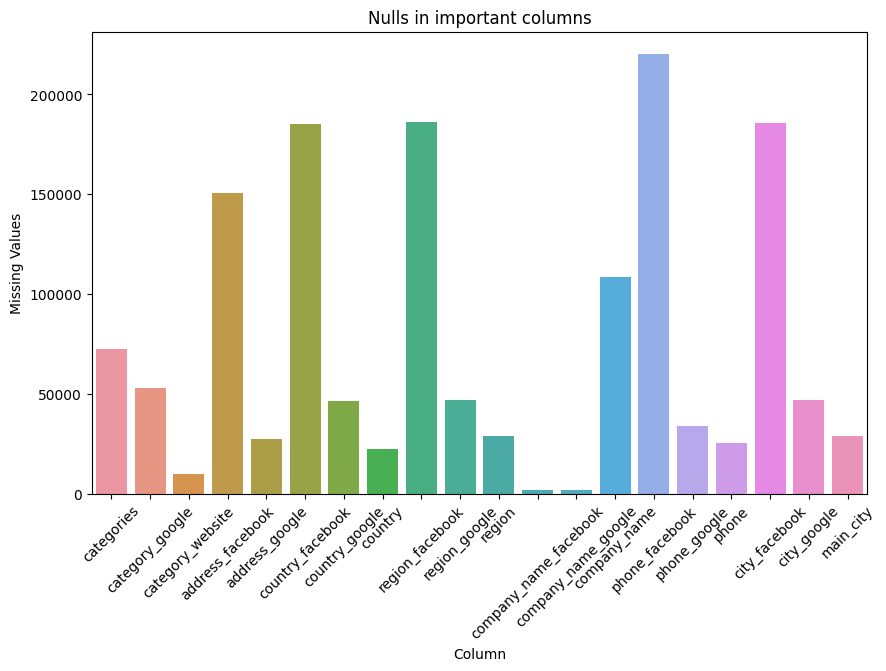

In [25]:
missingcounts = importantcoldf.isnull().sum().reset_index()
missingcounts.columns = ['Column', 'Missing Values']
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Missing Values', data=missingcounts)
plt.title("Nulls in important columns")
plt.xticks(rotation=45)
plt.show()

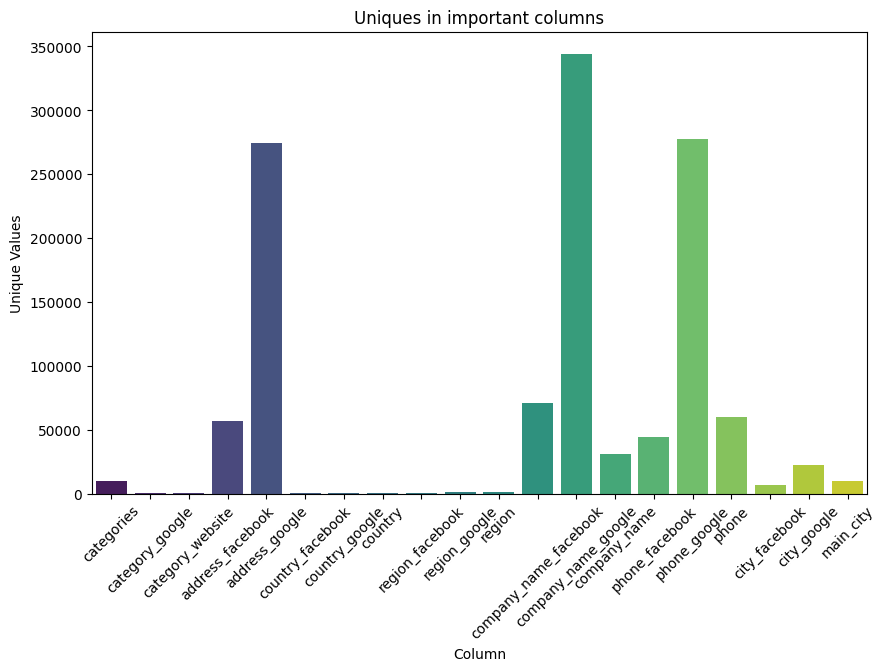

In [26]:
uniquecounts = importantcoldf.nunique().reset_index()
uniquecounts.columns = ['Column', 'Unique Values']
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Unique Values', data=uniquecounts, palette='viridis')
plt.title("Uniques in important columns")
plt.xticks(rotation=45)
plt.show()

**I think that the best approach when it comes to conflicting data is choosing the data from the dataset which best suits the column. I want to make my final dataset as full as possible and as reliable as possible.
I will choose the data from Website then Google for the category, country and region, and Google then Website for company name, phone and address.
Another way I think I could've done is just to select one dataset as the best one and just choose the data from that one dataset, it would've been easier for sure (especially if I had to do it on a huge amount of columns), but it might have had some downsides like having more nulls or data being bad.**

In [27]:
final_df['category'] = final_df['category_website'].combine_first(final_df['category_google'])
final_df['country'] = final_df['country'].combine_first(final_df['country_google'])
final_df['region'] = final_df['region'].combine_first(final_df['region_google'])
final_df['city'] = final_df['main_city'].combine_first(final_df['city_google'])

final_df['company name'] = final_df['company_name_google'].combine_first(final_df['company_name'])
final_df['phone'] = final_df['phone_google'].combine_first(final_df['phone'])
final_df['address'] = final_df['address_google']

In [28]:
final_df[['category', 'country', 'region', 'company name', 'phone', 'address', 'city']].isnull().sum()

category         1717
country          4934
region           7046
company name     1152
phone            3443
address         27523
city             7001
dtype: int64

**Now onto the third question (If you have very similar data, what information will you keep?).
When I think of which information to keep I will think that I should keep the most complete data (not a lot of nulls), the data that is most explicit, or the data that is most up to date (but I can't see that since I don't know when the data was scraped), or if the data is just the same I will pick whichever.
This question also connects with the stuff I did for the second question.**

In [29]:
final_df['full_address'] = final_df['country'].fillna('') + ', ' + final_df['region'].fillna('') + ', ' + final_df['address'].fillna('') + ', ' + final_df['city'].fillna('')

**I combined the address with city and region so we have a full address.**

In [30]:
final_df = final_df.drop_duplicates()

In [31]:
final_df.isnull().sum()

domain                              0
address_facebook               150682
categories                      72396
city_facebook                  185877
country_code_facebook          156184
country_facebook               184980
description                    272263
email                          308471
link                             1702
company_name_facebook            1702
page_type                        1709
phone_facebook                 220412
phone_country_code_facebook    263943
region_code_facebook           185882
region_facebook                185882
zip_code_facebook              210173
address_google                  27523
category_google                 52974
city_google                     46639
country_code_google             53477
country_google                  46603
company_name_google              1945
phone_google                    34049
phone_country_code_google      114734
raw_address                     45929
raw_phone                       29861
region_code_

In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348836 entries, 0 to 348835
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   domain                       348836 non-null  object 
 1   address_facebook             198154 non-null  object 
 2   categories                   276440 non-null  object 
 3   city_facebook                162959 non-null  object 
 4   country_code_facebook        192652 non-null  object 
 5   country_facebook             163856 non-null  object 
 6   description                  76573 non-null   object 
 7   email                        40365 non-null   object 
 8   link                         347134 non-null  object 
 9   company_name_facebook        347134 non-null  object 
 10  page_type                    347127 non-null  object 
 11  phone_facebook               128424 non-null  float64
 12  phone_country_code_facebook  84893 non-null   object 
 13  regi

In [33]:
final_df.drop(final_df.columns[[1, 2, 3, 5, 9, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 33, 38, 39]], axis=1, inplace=True)

In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348836 entries, 0 to 348835
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   domain                       348836 non-null  object
 1   country_code_facebook        192652 non-null  object
 2   description                  76573 non-null   object
 3   email                        40365 non-null   object
 4   link                         347134 non-null  object
 5   page_type                    347127 non-null  object
 6   phone_country_code_facebook  84893 non-null   object
 7   zip_code_facebook            138663 non-null  object
 8   region_code_google           302048 non-null  object
 9   text                         343410 non-null  object
 10  zip_code_google              265646 non-null  object
 11  domain_suffix                346668 non-null  object
 12  language                     330523 non-null  object
 13  company_name       

**I decided to only keep the columns I thought were important. Now I will save the final dataframe.**

In [36]:
final_df.to_csv("Veridion_Task_Gligore_Emil")